---
title: "motivation"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

See below a graph of the Dead Sea level in the past decades?

* How fast is it going down on average?
* How fast does it change from month to month?

In [1]:
#| code-summary: "import stuff"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)  # white graphs, with large and legible letters
# %matplotlib widget

In [9]:
#| code-summary: "load file to dataframe"
filename = "../archive/data/dead_sea_level.csv"
df = pd.read_csv(filename)
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df = df.set_index('date').sort_values(by='date')
# df

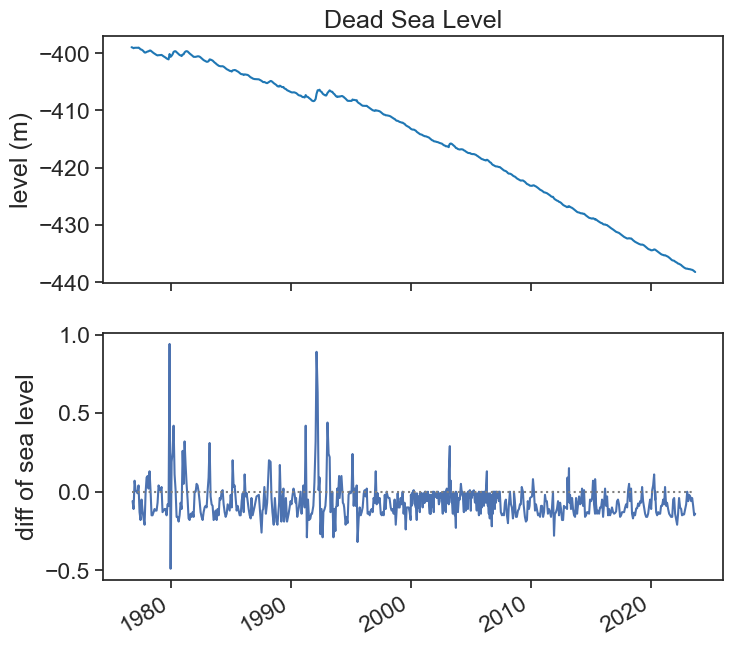

In [3]:
#| code-summary: "plot"
fig, ax = plt.subplots(2, 1, figsize=(8,8), sharex=True)
ax[0].plot(df['level'], color="tab:blue")
ax[0].set(title="Dead Sea Level",
       ylabel="level (m)")
ax[1].plot(df['level'].diff())
ax[1].plot(df['level']*0, ls=":", color="gray")
ax[1].set(ylabel="diff of sea level")
plt.gcf().autofmt_xdate()  # makes slanted dates

We suspect that the operation `diff` has something to do with derivatives, or rates of change.

* What exactly is this connection?
* What are (or should be) the units in the bottom graph?
* Should we care if data is evenly spaced in time?

We can resample by day (a much higher rate than the original), and linearly interpolate:

In [4]:
# df2 = df['level'].resample('D').interpolate('time').to_frame()
# df2['level_sm'] = df2['level'].rolling('30D', center=True).mean()
# df3 = df2['level'].resample('W').mean().to_frame()

In [5]:
# fig, ax = plt.subplots()
# ax.plot(df2.loc["1993":"1995", 'level_sm'],
#         color="tab:red",
#         label="daily resapled")
# ax.plot(df3.loc["1993":"1995", 'level'],
#         color="black",
#         label="daily resapled")
# ax.plot(df2.loc["1993":"1995", 'level'],
#         color="tab:orange",
#         label="daily resapled")
# ax.plot(df.loc["1993":"1995", 'level'],
#         color="tab:blue",
#         marker="o",
#         linestyle="None",
#         label="original")
# ax.set(title="Dead Sea Level",
#        ylabel="level (m)")
# plt.gcf().autofmt_xdate()  # makes slanted dates
# ax.legend(frameon=False)

In [6]:
# df2['naive'] = df2['level'].diff()
# df2['gradient'] = np.gradient(df2['level'])

# df3['naive'] = df3['level'].diff()
# df3['gradient'] = np.gradient(df3['level'])

In [7]:
# fig, ax = plt.subplots()
# ax.plot(df3.loc["1980":"2020", 'naive'], color="tab:blue")
# ax.plot(df3.loc["1980":"2020", 'gradient'], color="tab:red")
# ax.set(title="Dead Sea Level",
#        ylabel="level (m)")

In [8]:
# df3 = df2["level"].rolling('365.24D', center=True).mean().to_frame()